# Trabalho #2 - Transferência de Aprendizado

Nesse trabalho você vai utilizar uma RNA pré-treinada para realizar uma tarefa de classificação de múltiplas classes. A tarefa é determinar o tipo de objeto mostrado em imagens dentro de 10 classes possíveis. A rede pré-treinada que iremos utilizar é a VGG16 que está disponível no Keras.

## Coloque o seu nome aqui

Aluno: Bruno Pinto de Oliveira

RA: 21.84712-4

Em primeiro lugar é necessário importar alguns pacotes do Python que serão usados ao longo nesse trabalho:
- numpy pacote de cálculo científico com Python
- matplotlib biblioteca para gerar gráficos em Python
- TensorFlow

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 1 - Visão geral do problema ##

Nesse trabalho iremos usar o conjunto dados CIFAR-10. Esses dados consistem de um subconjunto de uma coleção de 80 milhões de imagens pequenas obtidas por Alex Krizhevsky, Vinod Nair e Geoffrey Hinton, disponível em https://www.cs.toronto.edu/~kriz/cifar.html.

O conjunto de dados CIFAR-10 consiste de 60.000 imagens coloridas com dimensão 32x32 divididas em 10 classes. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

As classes de objetos presentes nas imagens são as seguintes:

0. Avião										
1. Automóvel
2. Pássaro
3. Gato
4. Veado
5. Cachorro
6. Rã
7. cavalo
8. Navio
9. Caminhão

Não existe nenhuma imagem que contém objetos de mais de uma classe. Não há sobreposição entre automóveis e caminhões. "Automóvel" inclui sedans, SUVs etc. "Caminhão" inclui apenas caminhões grandes, não inclui picapes.

Assim, o objetivo desse problema é desenvolver um RNA que receba como entrada uma imagem e calcula a probabilidade de mostrar um determinado objeto das 10 classes possíveis. 


<img src="Cifar.png" style="width:600px;height:400px;">

## 2 - Dados de treinamento

O conjunto de dados CIFAR1-10 pode ser carregado diretamente do Keras. Os comandos para carregar esse cpnkutno de dadopode ser visto no link https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data.

Características dos dados:

- As imagens são coloridas e estão no padrão RGB;
- Cada imagem tem dimensão de 32x32x3;
- O valor da intensidade luminosa de cada plano de cor é um número inteiro entre 0 e 255;
- As saídas representam o rótulo o objeto mostrado na imagem, sendo um número inteiro de 0 a 9. 



### 2.1 - Leitura dos dados

Para iniciar o trabalho é necessário ler o arquivo de dados. Assim, execute o código da célula abaixo para ler o arquivo de dados.

In [20]:
# Leitura do arquivo de dados
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.cifar10.load_data()

print("Dimensão x_train_orig:", x_train_orig.shape, "Dimensão y_train_orig:", y_train_orig.shape)
print("Dimensão x_test_orig:", x_test_orig.shape, "Dimensão y_test:", y_test_orig.shape)

Dimensão x_train_orig: (50000, 32, 32, 3) Dimensão y_train_orig: (50000, 1)
Dimensão x_test_orig: (10000, 32, 32, 3) Dimensão y_test: (10000, 1)


Pela dimensão dos tensores com os dados de treinamento e teste temos:

- 50.000 imagens de treinamento com dimensão de 32x32x3 pixels;
- 10.000 imagens de teste com dimensão de 32x32x3 pixels.

Execute a célula a seguir para visualizar um exemplo de uma imagem do banco de dados juntamente com a sua classe. Altere o valor da variável 'index' e execute a célula novamente para visualizar mais exemplos diferentes.

y = 9


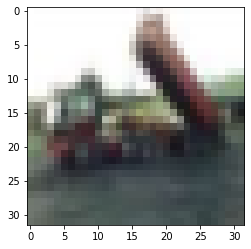

In [21]:
# Examplo de uma imagem
index = 2
plt.imshow(x_train_orig[index])
print ("y = " + str(np.squeeze(y_train_orig[index])))

### 2.2 - Processamento dos dados

Para os dados poderem ser usados para o desenvolvimento da RNA devemos primeiramente processá-los.

Para isso devemos realizar as seguintes etapas:

- Dividir os dados de treinamento nos conjuntos de treinamento e validação;
- Os valores dos pixels em uma imagem é um número inteiro que deve ser transformado em número real para ser usado em cálculos;
- Normalizar as imagens de forma que os valores dos pixels fique entre 0 e 1.

### Exercício #1: Divisão do conjunto de dados de treinamento

Como o conjunto de imagens é muito grande e demoraria muito tempo para treinar com todos esses dados, nesse trabalho usaremos somente metade dos dados. Assim, crie na célula abaixo um código para:

1. Dividir o conjunto de dados de treinamento nos conjuntos de treinamento e validação. Nessa divisão pegue os primeiros 30.000 exemplos para o conjunto de treinamento e os próximos 6.000 para o conjunto de validação.

2. Selecione os primeiros 6.000 exemplos do conjunto de teste para formar o novo conjunto de teste.

3. Não se esqueça de fazer a mesma selação para as saídas.

In [22]:
# PARA VOCÊ FAZER: divisão do conjunto de dados de treinamento

# Dados de entrada
# Inclua seu código aqui
x_train = x_train_orig[:30000,:]
x_val = x_train_orig[30000:36000,:]
x_test = x_test_orig[0:6000,:]

# Dados de saída
# Inclua seu código aqui
y_train = y_train_orig[:30000,:]
y_val = y_train_orig[30000:36000,:]
y_test = y_test_orig[0:6000,:]

print("Dimensão do tensor de dados de entrada de treinamento =", x_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", x_val.shape)
print("Dimensão do tensor de dados de entrada de teste =", x_test.shape)
print("Dimensão do tensor de dados de saída de treinamento =", y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", y_val.shape)
print("Dimensão do tensor de dados de saída de teste =", y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (30000, 32, 32, 3)
Dimensão do tensor de dados de entrada de validação = (6000, 32, 32, 3)
Dimensão do tensor de dados de entrada de teste = (6000, 32, 32, 3)
Dimensão do tensor de dados de saída de treinamento = (30000, 1)
Dimensão do tensor de dados de saída de validação = (6000, 1)
Dimensão do tensor de dados de saída de teste = (6000, 1)


**Saída desejada:**

    Dimensão do tensor de dados de entrada de treinamento = (30000, 32, 32, 3)
    Dimensão do tensor de dados de entrada de validação = (6000, 32, 32, 3)
    Dimensão do tensor de dados de entrada de teste = (6000, 32, 32, 3)
    Dimensão do tensor de dados de saída de treinamento = (30000, 1)
    Dimensão do tensor de dados de saída de validação = (6000, 1)
    Dimensão do tensor de dados de saída de teste = (6000, 1)

### Exercício #2: Normalização dos dados de entrada

na célula abaixo normalize e transforme as imagens em números reais dividindo por 255.

In [23]:
# PARA VOCÊ FAZER: normalização dos dados de entrada

# Guarda dimensão das imagens
image_dim = x_train.shape[1:4]
print("Dimensão das imagens de entrada=", image_dim)

# Transformação dos dados em números reais
# Inclua seu código aqui
# Transformação dos dados em números reais
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32') / 255


# Apresentação de alguns resultados para verificação
print('Alguns elementos de x_train:', x_train[0,0,0,:])
print('Alguns elementos de y_val:', x_val[0,0,0,:])
print('Alguns elementos de x_test:', x_test[0,0,0,:])

Dimensão das imagens de entrada= (32, 32, 3)
Alguns elementos de x_train: [0.23137255 0.24313726 0.24705882]
Alguns elementos de y_val: [0.69803923 0.6901961  0.7411765 ]
Alguns elementos de x_test: [0.61960787 0.4392157  0.19215687]


#### Verificação da normalização

In [24]:
print(np.min(x_train), np.max(x_train))

0.0 1.0


**Saída esperada:**

    Dimensão das imagens de entrada= (32, 32, 3)
    Alguns elementos de x_train: [0.23137255 0.24313726 0.24705882]
    Alguns elementos de y_val: [0.69803923 0.6901961  0.7411765 ]
    Alguns elementos de x_test: [0.61960787 0.4392157  0.19215687]

### Exercício #3: Codificação das classes

As classes dos objetos são identificadas por um número inteiro que varia de 0 a 9. Porém, a saída esperada de uma RNA para um problema de classificação de múltiplas classes é um vetor de dimensão igual ao número de classes, que no caso são 10 classes. Cada elemento desse vetor representa a probabilidade da imagem ser um sinal. Assim, devemos transformar as saídas reais do conjunto de dados em um vetor linha de 10 elementos, com todos os elementos iguais a zero a menos do correspondente ao da classe do sinal, que deve ser igual a um.

Como já visto, a função que realiza essa transformação é conhecida na literatura de `one-hot-encoding`, que no Keras é chamada de `to_categorical`. Na célula abaixo realize essa transfromação.

In [26]:
# PARA VOCÊ FAZER: codificação das classes

# Importa classe de utilidades do Keras
# Inclua seu código aqui
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
# Inclua seu código aqui
y_train_hot = to_categorical(y_train) 
y_val_hot = to_categorical(y_val) 
y_test_hot = to_categorical(y_test)

print('Dimensão dos dados de saída do conjunto de treinamento: ', y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', y_test_hot.shape)

Dimensão dos dados de saída do conjunto de treinamento:  (30000, 10)
Dimensão dos dados de saída do conjunto de validação:  (6000, 10)
Dimensão dos dados de saída do conjunto de teste:  (6000, 10)


### Verificação da Saída 'One-Hot'

In [27]:
print('Classe numérica:', y_train[:3])
print('Classe como vetor one-hot:\n', y_train_hot[:3])

Classe numérica: [[6]
 [9]
 [9]]
Classe como vetor one-hot:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**Saída esperada:**

    Dimensão dos dados de saída do conjunto de treinamento:  (30000, 10)
    Dimensão dos dados de saída do conjunto de validação:  (6000, 10)
    Dimensão dos dados de saída do conjunto de teste:  (6000, 10)

**Visualização da entrada e saída correspondente**

Execute a célula abaixo para verificar se o programa realizou de fato o que era esperado. No código abaixo index é o número sequencial da imagem. Tente trocar a imagem, mudando o index, usando valores entre 0 e 959, para visualizar outros exemplos.

Classe numérica:  [7] , Vetor de saída correspondentes:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


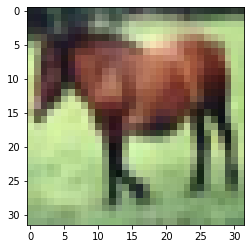

In [33]:
# Exemplo de saída
index = 7
print("Classe numérica: ", y_train[index], ", Vetor de saída correspondentes: ", y_train_hot[index])
plt.imshow(x_train_orig[index])
plt.show()

## 3 - RNA convolucional base

Nesse trabalho você irá usar uma RNA convolucional já treinada como base para criar outra RNA para realizar uma tarefa diferente da que a RNA base foi treinada. A RNA que será usada como base é a VGG16 vista em aula (Simonyan & Zisserman, Very deep convolutional networks for large-scale image recognition, 2015). 

A VGG16 foi desenvolvida para classificação de múltiplas classes com 1.000 classes. Ela é uitlizada para reconhecimento de objetos em imagens. A arquitetura da VGG é muito simples, sendo composta pela repetição de camadas convolucionais formando blocos. Cada bloco é composto por duas ou três camadas convolucionais, com filtros 3x3, stride = 1 e “same convolution”, seguida por uma camada de max-pooling, com janela 2x2 e stride = 2. A VGG16 mantém o mesmo padrão em todos os blocos dobrando o número de filtros a cada bloco. Apesar da VGG16 possuir muitos parâmetros, cerca de 138 milhões, ela é muito simples.

### Exercício #4: Carregar a VGG16

O TensorFlow-Keras possui na sua base de dados a RNA VGG16 treinada com o banco de imagens imagenet. Complete a célula abaixo para carregar a VGG16. Não se esqueça de excluir a parte densa e de definir a dimensão das imagens ao salvar a VGG16.

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

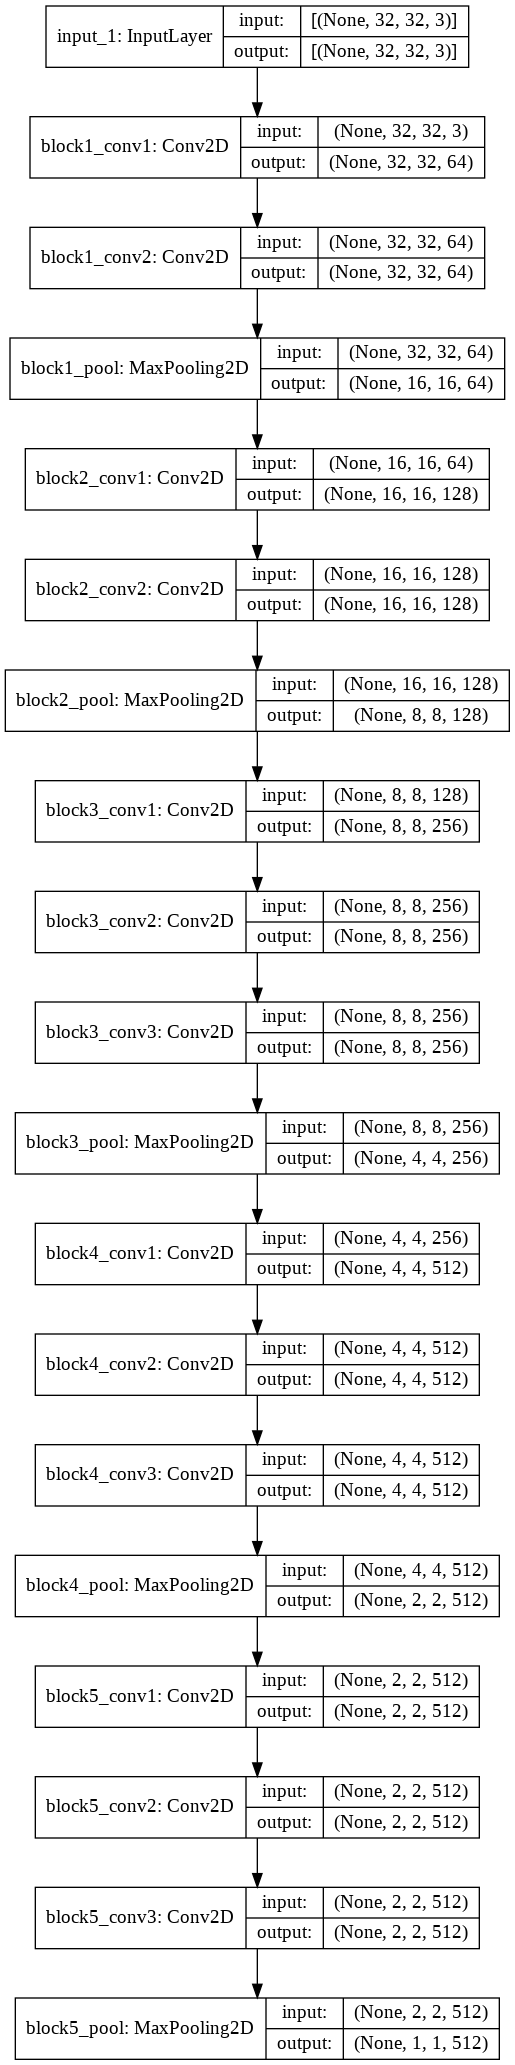

In [34]:
# PARA VOCÊ FAZER: carregar e salvar a VGG16 na rna_base

# Importa função para fazer gráfico de RNAs
# Inclua seu código aqui
from tensorflow.keras.utils import plot_model

# Carrega e salva a VGG16 excluindo suas camadas densas 
# Inclua seu código aqui
from tensorflow.keras.applications import VGG16

# Define dimensão das imagens
image_dim = (32, 32, 3)

# Carrega VGG16
rna_base = VGG16(weights='imagenet', include_top=False, input_shape=image_dim)

# Mostra a arquitetura da VGG16
rna_base.summary()

# Cria um arquivo com o esquema da VGG16
plot_model(rna_base, to_file='VGG16.png', show_shapes=True)   

**Saída esperada:**

    Model: "vgg16"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
    _________________________________________________________________
    block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
    _________________________________________________________________
    block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
    _________________________________________________________________
    block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
    _________________________________________________________________
    block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
    _________________________________________________________________
    block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
    _________________________________________________________________
    block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
    _________________________________________________________________
    block3_conv1 (Conv2D)        (None, 8, 8, 256)         295168    
    _________________________________________________________________
    block3_conv2 (Conv2D)        (None, 8, 8, 256)         590080    
    _________________________________________________________________
    block3_conv3 (Conv2D)        (None, 8, 8, 256)         590080    
    _________________________________________________________________
    block3_pool (MaxPooling2D)   (None, 4, 4, 256)         0         
    _________________________________________________________________
    block4_conv1 (Conv2D)        (None, 4, 4, 512)         1180160   
    _________________________________________________________________
    block4_conv2 (Conv2D)        (None, 4, 4, 512)         2359808   
    _________________________________________________________________
    block4_conv3 (Conv2D)        (None, 4, 4, 512)         2359808   
    _________________________________________________________________
    block4_pool (MaxPooling2D)   (None, 2, 2, 512)         0         
    _________________________________________________________________
    block5_conv1 (Conv2D)        (None, 2, 2, 512)         2359808   
    _________________________________________________________________
    block5_conv2 (Conv2D)        (None, 2, 2, 512)         2359808   
    _________________________________________________________________
    block5_conv3 (Conv2D)        (None, 2, 2, 512)         2359808   
    _________________________________________________________________
    block5_pool (MaxPooling2D)   (None, 1, 1, 512)         0         
    =================================================================
    Total params: 14,714,688
    Trainable params: 14,714,688
    Non-trainable params: 0
    _________________________________________________________________

**Observações:**

- A parte convolucional da VGG16 possui 5 blocos, sendo que cada bloco possui 2 ou 3 camadas convolucionais seguidas por uma camada de max-pooling.
- A VGG16 não é uma rede muito profunda, possuindo 13 camadas convolucionais.
- Apesar do grande número de parâmetros (138 milhões para a VGG16 completa com as suas camadas densas), a VGG16 é uma rede muito simples e rápida de ser excecutada e treinada, quando comparada com outras RNAs de mesmo desempenho.
- O esquema da VGG16 que você carregou foi gerado no arquivo VGG16.png que está no diretório que você está utilizando. Para ver esse esquema basta abrir esse arquivo.

## 4 - Uso da RNA base para extrair caracteríticas

Nessa parte do trabalho você vai usar a RNA base somente para extrair as caracteríticas das imagens de treinamento, validação e teste. Essas caracterísitcas serão usadas como entrada de uma nova RNA densa que será treinada para realizar a tarefa de classificação dos objetos.


### Exercício #5: Extração das características das imagens 

Na célula abaixo crie um código para executar a `rna_base` na forma de previsão para extrair as características das imagens de treinamento, validação e teste.

In [35]:
# PARA VOCÊ FAZER: gerar as características das imagens de treinamento, validação e teste pela rna_base.

# Inclua seu código aqui
# Extração do vetor de características, imagens e classes associadas dos dados de treinamento
train_features = rna_base.predict(x_train)
val_features = rna_base.predict(x_val)
test_features = rna_base.predict(x_test)


print("Dimensão do tensor de características das imagens de treinamento = ", train_features.shape)
print("Dimensão do tensor de características das imagens de validação = ", val_features.shape)
print("Dimensão do tensor de características das imagens de teste = ", test_features.shape)

Dimensão do tensor de características das imagens de treinamento =  (30000, 1, 1, 512)
Dimensão do tensor de características das imagens de validação =  (6000, 1, 1, 512)
Dimensão do tensor de características das imagens de teste =  (6000, 1, 1, 512)


**Saída esperada:**

    Dimensão do tensor de características das imagens de treinamento =  (30000, 1, 1, 512)
    Dimensão do tensor de características das imagens de validação =  (6000, 1, 1, 512)
    Dimensão do tensor de características das imagens de teste =  (6000, 1, 1, 512
    
Observe que as características extraídas de cada imagem tem dimensão (1, 1, 512), que é a dimensão do tensor de saída da `rna_base`.

### Exercício #6: Redimensionamento dos tensores de características

Como a RNA de classificação é composta por camadas densas, então temos que redimensionar os dados de entrada para transformá-los em um vetor. Crie na célula abaixo um código que realiza o redimensionamento das características usando a função `reshape` da biblioteca Numpy.

In [37]:
# PARA VOCÊ FAZER: redimensionamento dos tensores de características

# Recupera dimensões dos tensores de características
m, nlin, ncol, nfeat = train_features.shape
m_val = val_features.shape[0]
m_test = test_features.shape[0]

# Redimensiona tensores de características
# Inclua seu código aqui
train_carac = np.reshape(train_features, (m, nlin*ncol*nfeat))
val_carac = np.reshape(val_features, (m_val, nlin*ncol*nfeat))
test_carac = np.reshape(test_features, (m_test, nlin*ncol*nfeat))


print("Dimensão do tensor de características das imagens de treinamento = ", train_carac.shape)
print("Dimensão do tensor de características das imagens de validação = ", val_carac.shape)
print("Dimensão do tensor de características das imagens de teste = ", test_carac.shape)
print("Cinco primeiros elementos da 1a linha dos dados de treinamento: ", train_carac[0,0:5])
print("Cinco primeiros elementos da 1a linha dos dados de validação: ", val_carac[0,0:5])
print("Cinco primeiros elementos da 1a linha dos dados de teste: ", test_carac[0,0:5])

Dimensão do tensor de características das imagens de treinamento =  (30000, 512)
Dimensão do tensor de características das imagens de validação =  (6000, 512)
Dimensão do tensor de características das imagens de teste =  (6000, 512)
Cinco primeiros elementos da 1a linha dos dados de treinamento:  [0.10176678 0.         0.8440497  0.59437364 0.01329055]
Cinco primeiros elementos da 1a linha dos dados de validação:  [0.        0.        0.        0.4779706 0.       ]
Cinco primeiros elementos da 1a linha dos dados de teste:  [0.28653157 0.         1.2196403  0.1987209  0.2098026 ]


**Saída esperada:**

    Dimensão do tensor de características das imagens de treinamento =  (30000, 512)
    Dimensão do tensor de características das imagens de validação =  (6000, 512)
    Dimensão do tensor de características das imagens de teste =  (6000, 512)
    Cinco primeiros elementos da 1a linha dos dados de treinamento:  [0.10176882 0.         0.84404963 0.59437424 0.01328897]
    Cinco primeiros elementos da 1a linha dos dados de validação:   [0.         0.         0.         0.47797072 0.        ]
    Cinco primeiros elementos da 1a linha dos dados de teste:  [0.28653017 0.         1.2196395  0.19872142 0.20980349]

### Exercício #7: Configuração da RNA para classificação

Para realizar a classificação dos objetos nas imagens, você vai usar uma RNA com 2 camadas densas (uma camada intermediária e uma de saída) com as seguintes características:

- Tensor de entrada: tensor com os vetores de características das imagens, criado no exercício #5 anterior; 
- Camada intermediária: número de neurônios 32, função de ativação ReLu;
- Camada de saída: número neurônios 10, função de ativação softmax;
- Incluir Dropout após a camada intermediária com limitação da norma dos pesos das ligações igual a 3.0;
- Use uma fração de Dropout de 0.2.

Na célula abaixo crie a sua RNA.

In [41]:
# PARA VOCÊ FAZER: criação da RNA para classificação

# Importa do Keras classes de modelos e de camadas
# Inclua seu código aqui
from tensorflow.keras import models
from tensorflow.keras import layers


# Define dimensão do vetor de entrada
# Inclua seu código aqui
vetor_dim = (nlin*ncol*nfeat, )

# Define fração de Dropout
# Inclua seu código aqui
drop_out = 0.2

# Configuração da RNA
# Inclua seu código aqui
# Configura RNA para classificação rna = models.Sequential()
rna_class = models.Sequential()
rna_class.add(layers.Dense(32, activation='relu', input_shape=vetor_dim))
rna_class.add(layers.Dropout(drop_out))
rna_class.add(layers.Dense(10, activation='softmax'))



rna_class.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 16,746
Trainable params: 16,746
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**
    
    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 32)                16416     
    _________________________________________________________________
    dropout (Dropout)            (None, 32)                0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 10)                330       
    =================================================================
    Total params: 16,746
    Trainable params: 16,746
    Non-trainable params: 0
    _________________________________________________________________


### Exercício #8: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização Adams. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- método Adam;
- taxa de aprendizagem = 0.001;
- número de épocas = 50;
- verbose = 1.

In [43]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método Adam

# importa do keras a classe dos otimizadores
# Inclua seu código aqui
from tensorflow.keras import optimizers

# Configuração do otimizador
# Inclua seu código aqui
adam = optimizers.Adam(learning_rate=0.001)
rna_class.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer =adam)

# Treinamento da RNA (salve o resultado do treinamento no dicionário history)
# Inclua seu código aqui
history = rna_class.fit(train_carac, y_train_hot, epochs=50, validation_data=(test_carac, y_test_hot), verbose=1)


Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 1.6714 - accuracy: 0.4114 - val_loss: 1.3918 - val_accuracy: 0.5222
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 1.4116 - accuracy: 0.5076 - val_loss: 1.3083 - val_accuracy: 0.5418
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 1.3456 - accuracy: 0.5321 - val_loss: 1.2775 - val_accuracy: 0.5583
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 1.3000 - accuracy: 0.5471 - val_loss: 1.2504 - val_accuracy: 0.5655
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 1.2735 - accuracy: 0.5550 - val_loss: 1.2384 - val_accuracy: 0.5662
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 1.2502 - accuracy: 0.5626 - val_loss: 1.2310 - val_accuracy: 0.5708
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 1.2358 - accuracy: 0.5682 - val_loss: 1.2261 - val_accuracy: 0.5740
Epoch 

**Saída esperada:**

    Epoch 1/50
    938/938 [==============================] - 3s 3ms/step - loss: 1.6224 - accuracy: 0.4290 - val_loss: 1.3628 - val_accuracy: 0.5310
    .
    .
    .    
    Epoch 50/50
    938/938 [==============================] - 3s 3ms/step - loss: 1.0894 - accuracy: 0.6143 - val_loss: 1.1828 - val_accuracy: 0.5907

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

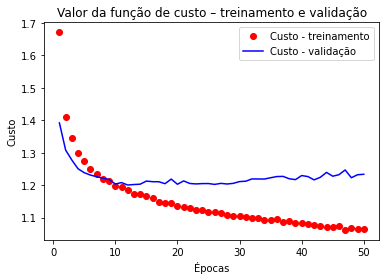

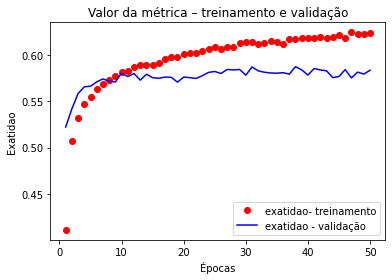

In [44]:
# Define função para fazer os gráficos do treinamento
def plot_results_train(history):
    # Salva treinamento na variável history para visualização
    history_dict = history.history

    # Salva custos, métricas e epocas em vetores 
    custo = history_dict['loss']
    acc = history_dict['accuracy']
    val_custo = history_dict['val_loss']
    val_acc = history_dict['val_accuracy']

    # Cria vetor de épocas
    epocas = range(1, len(custo) + 1)

    # Gráfico dos valores de custo
    plt.plot(epocas, custo, 'ro', label='Custo - treinamento')
    plt.plot(epocas, val_custo, 'b', label='Custo - validação')
    plt.title('Valor da função de custo – treinamento e validação')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    plt.show()

    # Gráfico dos valores da métrica
    plt.plot(epocas, acc, 'ro', label='exatidao- treinamento')
    plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
    plt.title('Valor da métrica – treinamento e validação')
    plt.xlabel('Épocas')
    plt.ylabel('Exatidao')
    plt.legend()
    plt.show()
    
# Realiza os gráficos chamando função plot_results_train
plot_results_train(history)

### Exercício #9: Cálculo dos custo e das métricas

Na célula abaixo crie um código para calcular os valores do custo e da exatidão para os dados de treinamento, validação e teste.

In [46]:
# PARA VOCÊ FAZER: Usando o método evaluate calcule o custo e exatidão resultantes do treinamento

#Calculo do custo e exatidão para os dados de treinamento, validação e teste
# Inclua seu código aqui
custo_e_metricas_train = rna_class.evaluate(train_carac, y_train_hot)
custo_e_metricas_val = rna_class.evaluate(val_carac, y_val_hot)
custo_e_metricas_test = rna_class.evaluate(test_carac, y_test_hot)



188/188 [==============================] - 1s 3ms/step - loss: 1.2335 - accuracy: 0.5833


**Saída esperada:**

    938/938 [==============================] - 2s 2ms/step - loss: 0.9416 - accuracy: 0.6722
    188/188 [==============================] - 0s 2ms/step - loss: 1.1828 - accuracy: 0.5907
    188/188 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.5853


**Análise dos resultados:**

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- Os resultados obtidos são ruins tanto para os dados de treinamento como para os dados de validação e teste.
- Mesmo com essa RNA tão "pequena" ocorreu um pouco de overfitting no treinamento.

Após entregar o seu trabalho, tente alterar a fração de dropout e treinar por mais épocas para ver o que acontece.

### Verificação dos resultados

Execute a célula abaixo para calcular as previsões da sua RNA para as imagens dos dados de teste e depois verificar se algumas dessas previsões estão corretas. Troque a variável index (variando entre 0 e 5.999) para verificar se a sua RNA consegue classificar corretamente o sinal de mão mostrado nas imagens.

classe prevista = 9
classe real = 8


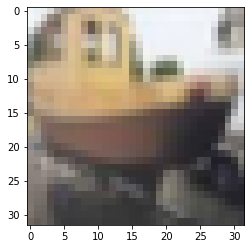

In [53]:
# Cálculo das classes previstas

# Calculo das previsões da RNA
y_pred = rna_class.predict(test_carac)

# Cálculo das classes previstas
classe = np.argmax(y_pred, axis=1)

# Exemplo de uma imagem dos dados de teste
index = 1002
plt.imshow(x_test_orig[index])
print ("classe prevista = " + str(np.squeeze(classe[index])))
print ("classe real = " + str(np.squeeze(y_test[index])))

## 5 - RNA completa para processamento das imagens e classificação

O segundo método de realizar transferência de treinamento é mais demorado e computacionalmente mais exigente, mas os resultados são melhores. Esse método consiste em estender a `rna_base` adicionando as camadas densas para classificação e treinar parcialmente a RNA resultante. A `rna_base` é adicionada como se fosse uma camada de uma RNA sequencial da mesma forma como adicionamos qualquer tipo de camada. Esse método permite criar uma nova RNA completa e, assim, obter resultados melhores do que somente usar a `rna_base` para extrair características.

### Exercício #10: Configuração da RNA completa usando a `rna_base`

Na célula abaixo crie um código para configurar uma nova RNA completa tendo como camadas convolucionais iniciais a `rna_base` e uma camada densas na saída. As características dessa RNA são as seguintes:

- Tensor de entrada: tensor com as imagens; 
- Dimensão das imagens de entrada está na variável `image_dim`;
- Camadas convolucionais: `rna_base`;
- Camada de saída: número neurônios 10, função de ativação softmax;

> Bloco com recuo



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


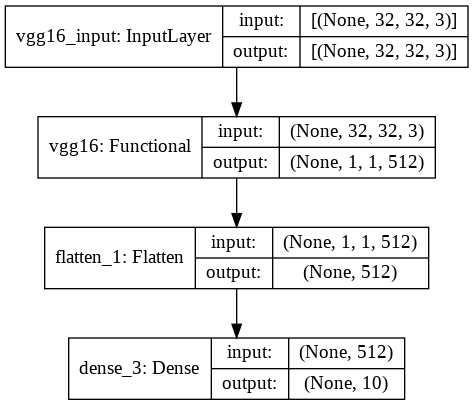

In [56]:
# PARA VOCÊ FAZER: criação da RNA completa

# Importa classe dos regularizadores
# Inclua seu código aqui
from tensorflow.keras import layers

# Inicia RNA sequencial com a rna_base e adiciona as camadas de flattenning e densas
# Inclua seu código aqui
input_layer = layers.InputLayer(input_shape=image_dim, name="input_1")

# Troca a camada de entrada da rna_base
rna_base.layers[0] = input_layer

# Inicia RNA sequencial com a rna_base e adiciona as camadas de flattenning e densas
rna = models.Sequential()

# Adiciona camadas convolucionais da VGG16
rna.add(rna_base)
rna.add(layers.Flatten())
rna.add(layers.Dense(10, activation='softmax'))

# Visualização da arquitetura da rede
rna.summary()

# Cria um arquivo com o esquema da rede
plot_model(rna, show_shapes=True)

**Saída esperada:**

    Model: "sequential_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    vgg16 (Functional)           (None, 1, 1, 512)         14714688  
    _________________________________________________________________
    flatten (Flatten)            (None, 512)               0         
    _________________________________________________________________
    dense_2 (Dense)              (None, 10)                5130      
    =================================================================
    Total params: 14,719,818
    Trainable params: 14,719,818
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #11: Congelamento dos parâmetros da `rna_base`

Antes de compilar e treinar essa nova RNA é muito importante “congelar” os parâmetros da `rna_base` e depois descongelar somente as camadas que queremos retreinar. “Congelar” uma camada, ou um conjunto de camadas significa impedir que os seus parâmetros sejam atualizados durante o treinamento.

Na célula abaixo crie um código que congela os parâmetros da `rna_base` definindo o seu atributo trainable igual a False (ver notas de aula).

In [57]:
# PARA VOCÊ FAZER: congelamento dos parâmetros da rna_base

# Número de parâmetros a serem treinados antes do congelamento
print('Número de parâmetros treináveis antes do congelamento =', len(rna.trainable_weights)) 

# Congelamento dos parâmetros da rna_base
# Inclua seu código aqui
rna_base.trainable = False


# Número de parâmetros a serem treinados após o congelamento
print('Número de parâmetros treináveis após o congelamento =', len(rna.trainable_weights)) 

Número de parâmetros treináveis antes do congelamento = 28
Número de parâmetros treináveis após o congelamento = 2


**Saída esperada:**

    Número de parâmetros treináveis antes do congelamento = 28
    Número de parâmetros treináveis após o congelamento = 2

### Exercício #12: Treinamento da parte de classificação da RNA completa

Agora você vai treinar a parte de classifcação da sua RNA usando o método de otimização Adams. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- método Adam;
- taxa de aprendizagem = 0.0005;
- número de épocas = 50;
- verbose = 1.

**Observação:** esse treinamento deve levar vários minutos.

In [59]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método Adam

# Configuração do otimizador
# Inclua seu código aqui
adam = optimizers.Adam(learning_rate=0.0005)
rna.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Treinamento da RNA
# Inclua seu código aqui
history = rna.fit(x_train, y_train_hot, epochs=50, validation_data= (x_val, y_val_hot),  verbose=1)


Epoch 1/50
938/938 [==============================] - 22s 22ms/step - loss: 1.7534 - accuracy: 0.4103 - val_loss: 1.5537 - val_accuracy: 0.4733
Epoch 2/50
938/938 [==============================] - 21s 22ms/step - loss: 1.4644 - accuracy: 0.5084 - val_loss: 1.4383 - val_accuracy: 0.5100
Epoch 3/50
938/938 [==============================] - 21s 22ms/step - loss: 1.3792 - accuracy: 0.5350 - val_loss: 1.3840 - val_accuracy: 0.5227
Epoch 4/50
938/938 [==============================] - 21s 22ms/step - loss: 1.3294 - accuracy: 0.5509 - val_loss: 1.3512 - val_accuracy: 0.5402
Epoch 5/50
938/938 [==============================] - 21s 22ms/step - loss: 1.2960 - accuracy: 0.5598 - val_loss: 1.3248 - val_accuracy: 0.5490
Epoch 6/50
938/938 [==============================] - 21s 22ms/step - loss: 1.2710 - accuracy: 0.5674 - val_loss: 1.3041 - val_accuracy: 0.5530
Epoch 7/50
938/938 [==============================] - 21s 22ms/step - loss: 1.2516 - accuracy: 0.5733 - val_loss: 1.2882 - val_accuracy:

**Saída esperada:**

    Epoch 1/50
    938/938 [==============================] - 10s 11ms/step - loss: 1.7721 - accuracy: 0.4693 - val_loss: 1.5760 - val_accuracy: 0.5077
    .
    .
    .
    Epoch 50/50
    938/938 [==============================] - 10s 10ms/step - loss: 1.3133 - accuracy: 0.5791 - val_loss: 1.3486 - val_accuracy: 0.5675

### Visualização dos resultados e cálculo do custo e da métrica

Execute a célula abaixo para fazer os gráficos da função de custo e da métrica durante o treinamento e calcular os valores do custo e da exatidão para os dados de treinamento, validação e teste.

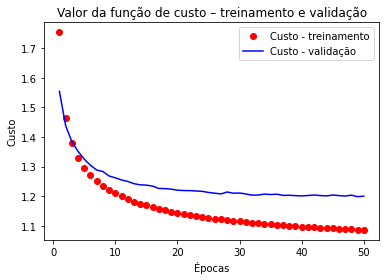

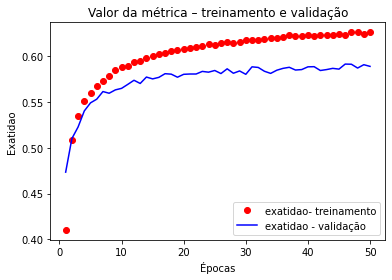

188/188 [==============================] - 3s 18ms/step - loss: 1.2045 - accuracy: 0.5835


In [60]:
# PARA VOCÊ FAZER: visualização e avaliação dos resultados

# Gráfico do processo de treinamento (use a função plot_results_train)
# Inclua seu código aqui
plot_results_train(history)

#Calculo do custo e exatidão para os dados de treinamento, validação e teste
# Inclua seu código aqui
custo_e_metricas_train = rna.evaluate(x_train, y_train_hot)
custo_e_metricas_val = rna.evaluate(x_val, y_val_hot)
custo_e_metricas_test = rna.evaluate(x_test, y_test_hot)


**Saída esperada:**

    938/938 [==============================] - 8s 8ms/step - loss: 1.2792 - accuracy: 0.5882
    188/188 [==============================] - 2s 8ms/step - loss: 1.3486 - accuracy: 0.5675
    188/188 [==============================] - 2s 8ms/step - loss: 1.3712 - accuracy: 0.5590

### Análise dos resultados

Pelos gráficos e valores da função de custo e da métrica para os dados de treinamento, validação e teste você deve observar que o treinamento e os resultados obtidos com essa RNA é praticamente igual ao obtido pelo método de extração de características. Isso era de se esperar porque não alteramos a parte convolucional da `rna_base`, assim, as características extraídas das imagens são exatamente iguais nos dois casos e como a parte densa de classificação dos dois métodos tem as mesmas caraterísticas, o resultado não pode ser diferente nos dois casos.

Para que seja possível obter resultados melhores com essa nova RNA temos que fazer a sua sintonia fina, ou seja, temos que retreinar a parte final da `rna_base` para ela se ajustar melhor aos novos dados.

### Exercício #13: Descongelamento dos parâmetros do último bloco da `rna_base`

Na célula abaixo crie um código que descongela as camadas convolucionais do último bloco da `rna_base` (`block_5`). Note que para isso você precisa saber os “nomes” das várias camadas da RNA. Verifique o nome da primmeira camada do último bloco da rna_base para incluir como um sinal para iniciar o descongelamento das camadas (ver notas de aula). 

In [61]:
# PARA VOCÊ FAZER: descongelamento das camadas convolucionais do block5.

# Descongela todas as camadas da rna_base
# Inclua seu código aqui
rna_base.trainable = True
set_trainable = False

# Percorre camadas da rna_base procurando pelo 5º bloco
# Inclua seu código aqui
for layer in rna_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# Número de parâmetros a serem treinados após o descongelamento parcial
print('Número de parâmetros treináveis após o descongelamento =', len(rna.trainable_weights)) 

Número de parâmetros treináveis após o descongelamento = 8


**Saída esperada:**

    Número de parâmetros treináveis após o descongelamento = 8

**Observação:** No treinamento da sua RNA 10 tensores de parâmetros serão treinados. Sendo que 6 pretencem às 3 últimas camadas convolucionais da `rna_base` (3 tensores de pesos dos filtros e 3 tensores de viéses) e 2 pertencem à parte de classificação da rede.


### Exercício #14: Sintonia fina da RNA completa

Agora a RNA está pronta para ser retreinada e sintonizada para o novo problema. Lembre-se de que a sintonia fina deve ser realizada com uma taxa de aprendizado muito pequena, porque se deseja limitar o valor das modificações das camadas convolucionais que estão sendo ajustadas. Atualizações muito grande dos parâmetros podem destruir completamente o treinamento original.

Agora você vai compilar e treinar a sua RNA usando os seguinte hiperparâmetros:

- método Adam;
- taxa de aprendizagem = 1e-05;
- número de épocas = 30;
- verbose = 1.

**Observação:** Esse treinamento deve levar vários minutos.

In [63]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método Adam

# Configuração do otimizador
# Inclua seu código aqui
adam = optimizers.Adam(learning_rate=1e-05)
rna.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Treinamento da RNA
# Inclua seu código aqui
history2 = rna.fit(x_train, y_train_hot, epochs=30, validation_data= (x_val, y_val_hot),  verbose=1)


Epoch 1/30
938/938 [==============================] - 34s 34ms/step - loss: 1.0102 - accuracy: 0.6508 - val_loss: 1.0198 - val_accuracy: 0.6433
Epoch 2/30
938/938 [==============================] - 31s 33ms/step - loss: 0.7980 - accuracy: 0.7207 - val_loss: 0.9745 - val_accuracy: 0.6610
Epoch 3/30
938/938 [==============================] - 31s 33ms/step - loss: 0.6714 - accuracy: 0.7668 - val_loss: 0.9300 - val_accuracy: 0.6787
Epoch 4/30
938/938 [==============================] - 31s 33ms/step - loss: 0.5719 - accuracy: 0.8054 - val_loss: 0.9018 - val_accuracy: 0.6955
Epoch 5/30
938/938 [==============================] - 31s 33ms/step - loss: 0.4864 - accuracy: 0.8362 - val_loss: 0.9301 - val_accuracy: 0.6960
Epoch 6/30
938/938 [==============================] - 31s 33ms/step - loss: 0.4147 - accuracy: 0.8659 - val_loss: 0.9350 - val_accuracy: 0.6952
Epoch 7/30
938/938 [==============================] - 31s 33ms/step - loss: 0.3537 - accuracy: 0.8863 - val_loss: 0.9087 - val_accuracy:

**Saída esperada:**

    Epoch 1/30
    938/938 [==============================] - 16s 17ms/step - loss: 1.1222 - accuracy: 0.6430 - val_loss: 1.0759 - val_accuracy: 0.6593
    .
    .
    .
    Epoch 30/30
    938/938 [==============================] - 16s 17ms/step - loss: 0.0565 - accuracy: 0.9861 - val_loss: 1.2857 - val_accuracy: 0.7338

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

In [ ]:
# Gráfico do processo de treinamento
plot_results_train(history)

Execute a célula abaixo para calcular os valores do custo e da exatidão para os dados de treinamento, validação e teste.

In [ ]:
#Calculo do custo e exatidão para os dados de treinamento, validação e teste
custo_e_metricas_train = rna.evaluate(x_train, y_train_hot)
custo_e_metricas_val = rna.evaluate(x_val, y_val_hot)
custo_e_metricas_test = rna.evaluate(x_test, y_test_hot)

**Saída esperada:**

    938/938 [==============================] - 8s 8ms/step - loss: 0.0308 - accuracy: 0.9971
    188/188 [==============================] - 2s 8ms/step - loss: 1.5541 - accuracy: 0.7290
    188/188 [==============================] - 2s 8ms/step - loss: 1.5556 - accuracy: 0.7380



### Análise dos resultados ###

- Pode-se observar que o treinamento não inicia do zero pois as camadas densas da RNA já foram pré-treinadas e agora somente estão sendo ajustados os parâmetros das últimas camadas convolucionais da `rna_base` e retreinando as camadas densas.
- Uma exatidão de cerca de 73% para os dados de validação e de teste represetam um resultado não muito bom.
- Observa-se que os resultados da exatidão para os dados de teste melhoraram bastante, mas não o suficiente em razão do problema de overfitting.

Observa-se que para eliminar esse problema de overfitting teríamos que introduzir regularização L2 e/ou dropout nas camadas convolucionais que retreinamos. Se isso fosse feito certamente conseguiríamos resultados para o conjunto de teste da ordem de 99%, como os obtidos para o conjunto de treinamento.

### Exercício #15: Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA para as imagens dos dados de teste e depois verifique se algumas dessas previsões estão corretas fazendo o gráfico das classes previstas e reais dos primeiros 150 exemplos de teste.

Note que a previsão da RNA é um vetor de 10 elementos com as probabilidades da imagem mostrar os seis sinais. Para determinar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 9, que representa o sinal sendo mostrado. Para fazer essa transformação use a função numpy `argmax(y_prev, axis=?)`, onde `y_prev` é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Dimensão vetor classes reais (6000, 1)
Dimensão vetor classes previstas (6000,)


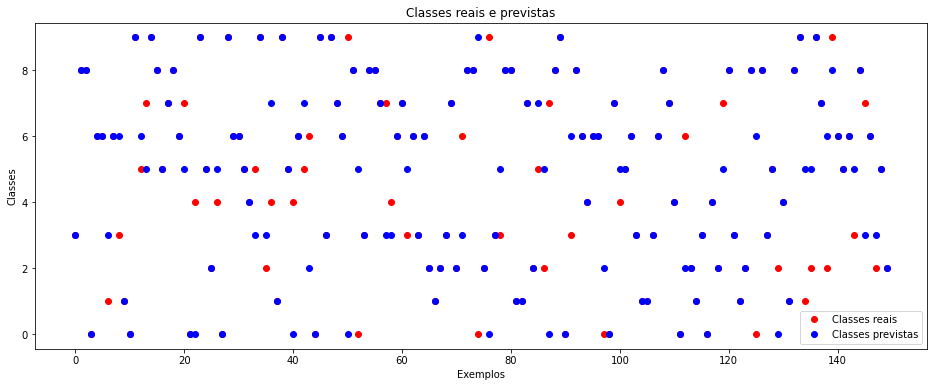

In [68]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA com dropout

# Calculo das previsões da RNA
# Inclua seu código aqui
y_prev = rna.predict(x_test)


# Cálculo das classes previstas
# Inclua seu código aqui
classe = np.argmax(y_prev, axis=1)

# Gráfico das classes reais e previstas
# Fazer o gráfico das classes reais e previstas dos 150 primeiros exemplos de teste
# Inclua seu código aqui
#Dimensão dos dados
print("Dimensão vetor classes reais", y_test.shape)
print("Dimensão vetor classes previstas", classe.shape)      

# Gráfico das classes reais e previstas (100 primeiros exemplos)
plt.figure(figsize=(16, 6))
plt.plot(y_test[:150], 'ro', label='Classes reais')
plt.plot(classe[:150], 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()





**Saída esperada:**

<img src="Classes_previstas.png">

**Comentários:**

- Uma previsão errada de classe pode ser dectada pelos círculos vermelhos, pois quando a classe prevista é igual à classe real o círculo azul é colocado em cima do vermelho tapando-o.

- No gráfico devem aparecer mais círculos azuis do que vermelhos indicando que existem mais acertos do que erros na previsão das classes.



**Visualização de previsões erradas:**

Use o gráfico acima e escolha um exemplo onde a previsão da sua RNA está errada. Na célula abaixo troque a variável `index` e execute-a para verificar se o exemplo tem alguma particularidade que dificulta a sua RNA de prever corretamente a classe desse exemplo.

classe prevista = 9
classe real = 8


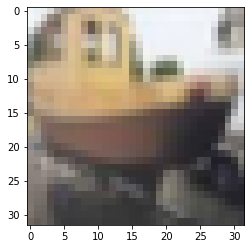

In [74]:
# Cálculo das classes previstas pela RNA com dropout

# Exemplo de uma imagem dos dados de teste
index = 1002
plt.imshow(x_test_orig[index])
print ("classe prevista = " + str(np.squeeze(classe[index])))
print ("classe real = " + str(np.squeeze(y_test[index])))


### Conclusões

Os resultados obtidos não foram muito bons, por causa de problemas de overfitting. Para melhorar esses resultados teríamos que resolver o problema de overfitting aplicando dropout e/ou regularização nas camadas convolucionais retreinadas.

Apesar dos resultados não muito satisfatórios, observa-se o seguinte:

- Transferência de aprendizado consiste de uma abordagem fácil e altamente eficiente para desenvolver uma nova aplicação.


- Transferência de aprendizado é muito eficiente, principalmente quando o banco de dados disponível é pequeno.


- Existem dois métodos para usar uma RNA pré-treinada. Qualquer um dos dois métodos é eficiente para obter sistemas com bom desempenho, mesmo quando o conjunto de dados é pequeno.


- A transferência de treinamento realizada com treinamento parcial com a técnica de sintonia fina é muito eficiente para obter sistemas com alto desempenho, mesmo quando o conjunto de dados é pequeno.